In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns

# 设置中文显示
font_path = ('/System/Library/Fonts/STHeiti Light.ttc')
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 读取数据文件
orders = pd.read_csv('data/instacart/orders.csv')
order_products = pd.read_csv('data/instacart/order_products__prior.csv')
products = pd.read_csv('data/instacart/products.csv')
aisles = pd.read_csv('data/instacart/aisles.csv')

# 数据合并
# 先合并订单和订单产品
#inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
df = pd.merge(orders, order_products, on='order_id', how='inner')

# 再合并产品信息
df = pd.merge(df, products, on='product_id', how='inner')

# 最后合并货架信息
df = pd.merge(df, aisles, on='aisle_id', how='inner')

# 显示合并后的数据前几行
print("合并后的数据预览：")


# 显示数据基本信息
print("\n数据基本信息：")
print(df.info())
df.head()

合并后的数据预览：

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
dtypes: float64(1), int64(10), object(3)
memory usage: 3.4+ GB
None


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods


In [47]:
df.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
dtype: int64

In [48]:
df.isnull().sum()/df.shape[0]  #数据缺失率，没有缺失值

order_id                  0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    0.06407
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
aisle                     0.00000
dtype: float64

In [49]:
# 创建用户和货架类别的交叉表
# 首先计算每个用户对每个货架的购买次数
#.reset_index() is a Pandas method used to convert the current index of a DataFrame into regular columns, and reset the index to the default integer index (0, 1, 2, …).
#(name='count') “Turn the result into a DataFrame and name the new column 'count'.”When you use methods like .size() or .value_counts(), they return a Pandas Series (not a DataFrame). By default, this Series has no column name.
user_aisle = df.groupby(['user_id', 'aisle_id']).size().reset_index(name='count')

# 将数据透视为交叉表格式
user_aisle_pivot = user_aisle.pivot_table(
    index='user_id',
    columns='aisle_id',
    values='count',
    fill_value=0
)

# 显示交叉表的形状和前几行
print(f"交叉表形状: {user_aisle_pivot.shape}")
print("\n交叉表前5行:")
# notice aisle_id is sorted in ascending order and includes all aisle_id in the dataset.(for those not in the dataset, the count is 0)
user_aisle_pivot.head() #数据比较稀疏


交叉表形状: (206209, 134)

交叉表前5行:


aisle_id,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.groupby(['user_id', 'aisle_id']).size().reset_index(name='count')

,user_id,aisle_id,count
0,1,21,8
1,1,23,12
2,1,24,5
3,1,45,1
4,1,53,2
...,...,...,...
5729244,206209,120,3
5729245,206209,121,6
5729246,206209,123,5
5729247,206209,130,3


In [51]:
del df

In [52]:
# 使用PCA对用户-货架交叉表进行降维
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 应用PCA降维
print(f"PCA降维前的形状: {user_aisle_pivot.shape}")
# n_components=0.9: Find the smallest number of principal components (new features) such that 90% of the total variance in the data is preserved
pca = PCA(n_components=0.9) 
user_aisle_pca = pca.fit_transform(user_aisle_pivot)

print(f"PCA降维后的形状: {user_aisle_pca.shape}")
print(f"保留的方差比例: {pca.explained_variance_ratio_.sum():.4f}")
print(f"保留的特征数量: {pca.n_components_}")


PCA降维前的形状: (206209, 134)
PCA降维后的形状: (206209, 27)
保留的方差比例: 0.9015
保留的特征数量: 27


In [53]:
# after pca , new columns' values are not the same features', but instead reorganized axes based on the directions of highest variance in the data.
user_aisle_pca

array([[-2.42156587e+01, -2.42942720e+00, -2.46636975e+00, ...,
         6.86800336e-01,  1.69439402e+00, -2.34323022e+00],
       [ 6.46320806e+00, -3.67511165e+01,  8.38255336e+00, ...,
         4.12121252e+00,  2.44689740e+00, -4.28348478e+00],
       [-7.99030162e+00, -2.40438257e+00, -1.10300641e+01, ...,
         1.77534453e+00, -4.44194030e-01,  7.86665571e-01],
       ...,
       [ 8.61143331e+00, -7.70129866e+00,  7.95240226e+00, ...,
        -2.74252456e+00,  1.07112531e+00, -6.31925661e-02],
       [ 8.40862199e+01, -2.04187340e+01,  8.05410372e+00, ...,
         7.27554259e-01,  3.51339470e+00, -1.79079914e+01],
       [-1.39534562e+01, -6.64621821e+00, -5.23030367e+00, ...,
         8.25329076e-01,  1.38230701e+00, -2.41942061e+00]])

In [54]:
# 使用K-means聚类，分为3类 
kmeans = KMeans(n_clusters=3)
# fit Returns:Fitted estimator
clusters = kmeans.fit(user_aisle_pca)
# predict: return Index of the cluster each sample belongs to.
predict = kmeans.predict(user_aisle_pca)
# 计算轮廓系数进行评估
#after prediction, we need evaluate the quality of clustering using silhouette score.
# silhouette_score Returns: Mean Silhouette Coefficient for all samples (which equals sum of all points' Silhouette Coefficient divided by number of points).
silhouette_avg = silhouette_score(user_aisle_pca, predict)
# the more Silhouette Coefficient near 1, the better the clustering result.(means different clusters are well separated)
print(f"K=3时的轮廓系数: {silhouette_avg:.4f}")



K=3时的轮廓系数: 0.5496


In [55]:
colored = ['orange', 'green', 'blue']
colr = [colored[i] for i in predict]

In [56]:
#Find the unique elements of an array.
np.unique(predict)

array([0, 1, 2], dtype=int32)

In [62]:
user_aisle_pca

array([[-2.42156587e+01, -2.42942720e+00, -2.46636975e+00, ...,
         6.86800336e-01,  1.69439402e+00, -2.34323022e+00],
       [ 6.46320806e+00, -3.67511165e+01,  8.38255336e+00, ...,
         4.12121252e+00,  2.44689740e+00, -4.28348478e+00],
       [-7.99030162e+00, -2.40438257e+00, -1.10300641e+01, ...,
         1.77534453e+00, -4.44194030e-01,  7.86665571e-01],
       ...,
       [ 8.61143331e+00, -7.70129866e+00,  7.95240226e+00, ...,
        -2.74252456e+00,  1.07112531e+00, -6.31925661e-02],
       [ 8.40862199e+01, -2.04187340e+01,  8.05410372e+00, ...,
         7.27554259e-01,  3.51339470e+00, -1.79079914e+01],
       [-1.39534562e+01, -6.64621821e+00, -5.23030367e+00, ...,
         8.25329076e-01,  1.38230701e+00, -2.41942061e+00]])

/var/folders/nt/z2_pm9xj1bl1zz8q88mshrpc0000gn/T/ipykernel_4303/3972398583.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(user_aisle_pca[:, 0], user_aisle_pca[:, 1],c=colr,cmap='viridis', alpha=0.5)


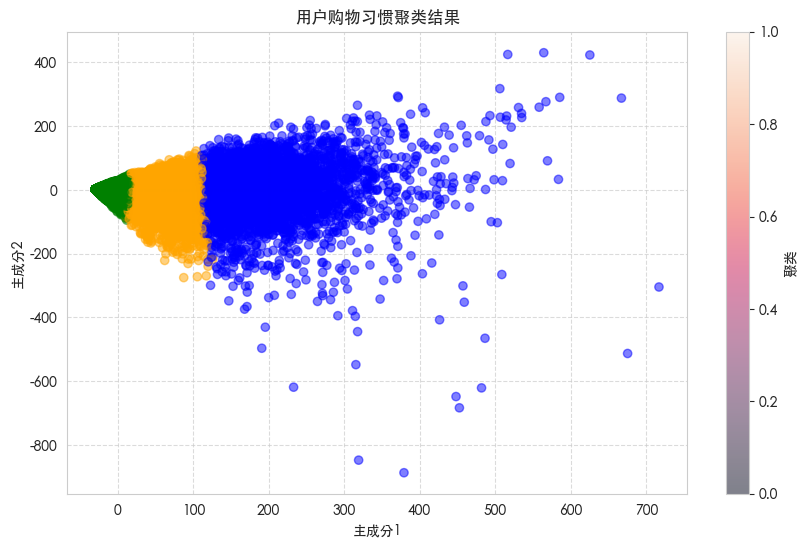

In [71]:
# 可视化聚类结果（取前两个主成分）
plt.figure(figsize=(10, 6))
# cmap: colormap to use.cmap='viridis'
"""
	'viridis' is a popular colormap in Matplotlib.
	•	It smoothly transitions from dark purple → blue → green → yellow.
	•	It’s perceptually uniform, meaning equal steps in data are perceived as equal steps in color.
"""
plt.scatter(user_aisle_pca[:, 0], user_aisle_pca[:, 1],c=colr,cmap='viridis', alpha=0.5)
plt.title("用户购物习惯聚类结果")
plt.xlabel("主成分1")
plt.ylabel("主成分2")
plt.colorbar(label='聚类')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# # 统计各类别的用户数量
# cluster_counts = pd.Series(clusters).value_counts().sort_index()
# print("各类别的用户数量:")
# print(cluster_counts)
# 
# # 尝试不同的K值，找到最佳聚类数量
# silhouette_scores = []
# k_range = range(2, 10)
# 
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(user_aisle_pca)
#     silhouette_avg = silhouette_score(user_aisle_pca, cluster_labels)
#     silhouette_scores.append(silhouette_avg)
#     print(f"K={k}时的轮廓系数: {silhouette_avg:.4f}")
# 
# # 绘制轮廓系数随K值变化的曲线
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, silhouette_scores, 'o-')
# plt.title("不同聚类数量的轮廓系数")
# plt.xlabel("聚类数量(K)")
# plt.ylabel("轮廓系数")
# plt.grid(True)
# plt.show()

In [2]:
import pandas as pd
# 限制读取的数据量，每个文件只读取前100万行
orders = pd.read_csv('data/instacart/orders.csv', nrows=1000000)
order_products = pd.read_csv('data/instacart/order_products__prior.csv', nrows=1000000)
products = pd.read_csv('data/instacart/products.csv', nrows=1000000)
aisles = pd.read_csv('data/instacart/aisles.csv', nrows=1000000)

# 打印读取的数据行数
print(f"订单数据行数: {len(orders)}")
print(f"订单产品数据行数: {len(order_products)}")
print(f"产品数据行数: {len(products)}")
print(f"货架数据行数: {len(aisles)}")


订单数据行数: 1000000
订单产品数据行数: 1000000
产品数据行数: 49688
货架数据行数: 134
